Chapter 10

# 二元高斯分布的边缘分布
Book_5《统计至简》 | 鸢尾花书：从加减乘除到机器学习 (第二版)

这段代码通过生成和可视化联合正态分布及其边缘分布来展示二维正态分布的结构。具体步骤如下：

1. **设定参数和协方差矩阵**：定义了均值向量 $ \mu = [\mu_X, \mu_Y] $ 和协方差矩阵 $ \Sigma $：
   $$
   \Sigma = \begin{bmatrix} \sigma_X^2 & \rho \sigma_X \sigma_Y \\ \rho \sigma_X \sigma_Y & \sigma_Y^2 \end{bmatrix}
   $$
   其中 $\rho$ 表示变量 $X$ 和 $Y$ 之间的相关性，$\sigma_X$ 和 $\sigma_Y$ 分别是 $X$ 和 $Y$ 的标准差。

2. **生成二维网格并计算联合概率密度函数 (PDF)**：通过 `meshgrid` 创建 $X$ 和 $Y$ 的二维坐标网格，随后计算每个坐标的联合正态分布值 $f_{X,Y}(x,y)$，即联合 PDF。

3. **可视化联合和边缘分布**：
   - **联合分布**：在主图中（左上角）绘制联合 PDF 的等高线图，展示变量 $X$ 和 $Y$ 之间的联合分布。轮廓显示了在不同水平的联合概率密度。
   - **边缘分布**：
     - **$f_Y(y)$ 边缘分布**：右上图展示了 $Y$ 的边缘分布（即对于固定 $X$ 的 $Y$ 的分布）。$f_Y(y)$ 的计算使用 $Y$ 的正态分布 PDF 公式：
       $$
       f_Y(y) = \frac{1}{\sqrt{2\pi}\sigma_Y} e^{-\frac{(y - \mu_Y)^2}{2\sigma_Y^2}}
       $$
     - **$f_X(x)$ 边缘分布**：左下图展示了 $X$ 的边缘分布（即对于固定 $Y$ 的 $X$ 的分布），也基于正态分布 PDF 公式：
       $$
       f_X(x) = \frac{1}{\sqrt{2\pi}\sigma_X} e^{-\frac{(x - \mu_X)^2}{2\sigma_X^2}}
       $$

4. **标记均值线**：在联合和边缘分布图中，用虚线标记了 $X$ 和 $Y$ 的均值 $\mu_X$ 和 $\mu_Y$ 的位置，以清楚地显示分布的对称中心。

最终结果是一个展示二维正态分布的联合和边缘分布的图形，左上角为联合 PDF 等高线图，其余为边缘分布图，提供了关于 $X$ 和 $Y$ 的概率结构的直观理解。

这段代码生成并可视化二维正态分布的联合概率密度函数 (PDF)，以及 $X$ 和 $Y$ 的边缘分布。首先定义了分布的均值、标准差和相关系数，然后绘制了二维正态分布的联合密度图及其边缘分布。使用四个子图分别展示联合密度等高线图以及 $X$ 和 $Y$ 的边缘概率密度。

### 联合分布密度函数
二维正态分布的联合密度函数 $f_{X,Y}(x,y)$ 表示为：
$$
f_{X,Y}(x,y) = \frac{1}{2\pi \sigma_X \sigma_Y \sqrt{1 - \rho^2}} \exp \left( -\frac{1}{2(1 - \rho^2)} \left( \frac{(x - \mu_X)^2}{\sigma_X^2} - 2\rho \frac{(x - \mu_X)(y - \mu_Y)}{\sigma_X \sigma_Y} + \frac{(y - \mu_Y)^2}{\sigma_Y^2} \right) \right)
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib import cm  # 导入颜色映射
from scipy.stats import multivariate_normal
from scipy.stats import norm

## 参数设置

In [2]:
rho     = 0.75  # 设置相关系数
sigma_X = 1     # 设置 X 的标准差
sigma_Y = 1     # 设置 Y 的标准差

mu_X = 0        # 设置 X 的均值
mu_Y = 0        # 设置 Y 的均值
mu    = [mu_X, mu_Y]  # 定义均值向量

In [3]:
Sigma = [[sigma_X**2, sigma_X*sigma_Y*rho],  # 定义协方差矩阵
        [sigma_X*sigma_Y*rho, sigma_Y**2]]

## 数据准备

In [4]:
width = 4  # 设置绘图范围
X = np.arange(-width, width, 0.05)  # 创建 X 的线性空间
Y = np.arange(-width, width, 0.05)  # 创建 Y 的线性空间

XX, YY = np.meshgrid(X, Y)  # 创建网格数据

XXYY = np.dstack((XX, YY))  # 组合 X 和 Y 的网格
bi_norm = multivariate_normal(mu, Sigma)  # 创建二维正态分布对象

## 联合概率密度函数

In [5]:
f_X_Y_joint = bi_norm.pdf(XXYY)  # 计算联合分布的概率密度

## 绘制条件分布图

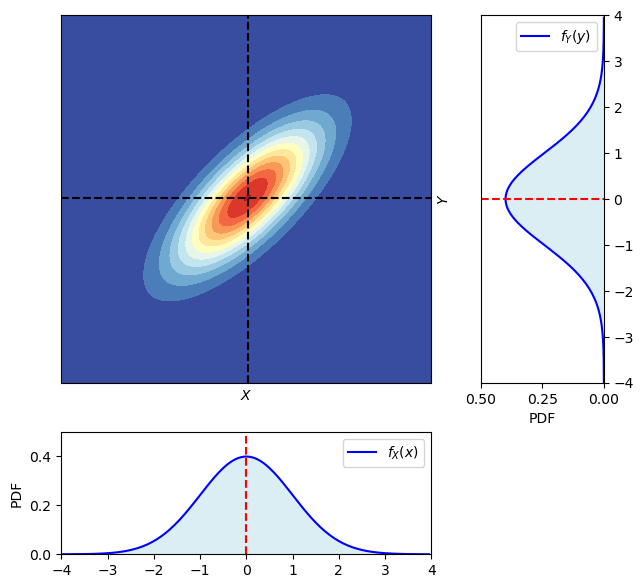

In [6]:
fig = plt.figure(figsize=(7, 7))  # 设置图形大小
gs = gridspec.GridSpec(2, 2, 
                       width_ratios=[3, 1], 
                       height_ratios=[3, 1])  # 设置网格布局

## 绘制联合分布图在左上角

ax1 = plt.subplot(gs[0])  # 创建子图1

ax1.contourf(XX, YY, f_X_Y_joint, 15, cmap=cm.RdYlBu_r)  # 绘制联合分布的等高线图
ax1.axvline(x = mu_X, color = 'k', linestyle = '--')  # 绘制 X 的均值垂直线
ax1.axhline(y = mu_Y, color = 'k', linestyle = '--')  # 绘制 Y 的均值水平线

ax1.set_xlabel('$X$')  # 设置 X 轴标签
ax1.set_ylabel('$Y$')  # 设置 Y 轴标签
ax1.yaxis.set_label_position('right')  # 设置 Y 轴标签位置
ax1.set_xticks([])  # 隐藏 X 轴刻度
ax1.set_yticks([])  # 隐藏 Y 轴刻度

## 绘制 Y 边缘分布

ax2 = plt.subplot(gs[1])  # 创建子图2
f_Y = norm.pdf(Y, loc=mu_Y, scale=sigma_Y)  # 计算 Y 的边缘分布

ax2.plot(f_Y, Y, 'b', label='$f_{Y}(y)$')  # 绘制 Y 的边缘分布曲线
ax2.axhline(y = mu_Y, color = 'r', linestyle = '--')  # 绘制 Y 的均值水平线

ax2.fill_between(f_Y,Y, 
                 edgecolor = 'none', 
                 facecolor = '#DBEEF3')  # 填充 Y 的边缘分布
ax2.legend(loc=0)  # 显示图例
ax2.set_xlabel('PDF')  # 设置 X 轴标签
ax2.set_ylim(-width, width)  # 设置 Y 轴范围
ax2.set_xlim(0, 0.5)  # 设置 X 轴范围
ax2.invert_xaxis()  # 反转 X 轴
ax2.yaxis.tick_right()  # 设置 Y 轴刻度位置

## 绘制 X 边缘分布

ax3 = plt.subplot(gs[2])  # 创建子图3
f_X = norm.pdf(X, loc=mu_X, scale=sigma_X)  # 计算 X 的边缘分布

ax3.plot(X, f_X, 'b', label='$f_{X}(x)$')  # 绘制 X 的边缘分布曲线
ax3.axvline(x = mu_X, color = 'r', linestyle = '--')  # 绘制 X 的均值垂直线

ax3.fill_between(X,f_X, 
                 edgecolor = 'none', 
                 facecolor = '#DBEEF3')  # 填充 X 的边缘分布
ax3.legend(loc=0)  # 显示图例
ax3.set_ylabel('PDF')  # 设置 Y 轴标签
ax3.yaxis.set_label_position('left')  # 设置 Y 轴标签位置
ax3.set_xlim(-width, width)  # 设置 X 轴范围
ax3.set_ylim(0, 0.5)  # 设置 Y 轴范围

## 隐藏右下角空白图

ax4 = plt.subplot(gs[3])  # 创建子图4
ax4.set_visible(False)  # 隐藏子图4
